# Collaboration and Competition

---

This notebook runs John's solution for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.  It uses the Unity ML-Agents environment to train two cooperative agents to play a tennis-like game.

**Need more description here - refer to readme?**






...


This code depends upon a custom Unity environment provided by the Udacity staff that embodies the variation on tennis.  It will open a separate Unity window for visualizing the environment as the agents train or play.


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from train import train
from maddpg import Maddpg

%matplotlib inline

# create a new Unity environment
# it needs to be done once, outside any loop, as closing an environment then restarting causes
# a Unity exception about the handle no longer being active.
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64", seed=0, 
                       no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]                       
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Train the agents

The next cells will invoke the training program to create the agents.  All of the real code is in Python flat files in this project directory.

In [2]:
TRAIN = False
EXPLORE = True

Ready to train over 18 training sets for 15001 episodes each

///// Beginning training set  E15.01  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  468
      Learning every      5  time steps
      Learn iterations =  1
500	Average score:   0.007,        mem:   1076/    27 ( 2.5%), avg 1391.4 eps/min;  0.2 hr rem   
1000	Average score:   0.012,        mem:   1219/    69 ( 5.7%), avg 1272.5 eps/min;  0.2 hr rem   
1500	Average score:   0.010,        mem:   1336/   107 ( 8.0%), avg 1282.2 eps/min;  0.2 hr rem   
2000	Average score:   0.007,        mem:   1450/   139 ( 9.6%), avg 1276.2 eps/min;  0.2 hr rem   
2500	Average score:   0.009,        mem:   1574/   184 (11.7%), avg 1260.1 eps/min;  0.2 hr rem   
3000	Average score:   0.011,        mem:   1699/   226 (13.3%), avg 1199.4 eps/min;  0.2 hr rem   
3500	Average score:   0.006,        mem:   1798/   251 (14.0%), avg 1189.8 eps/min;  0.2 hr rem   
4000	Avera

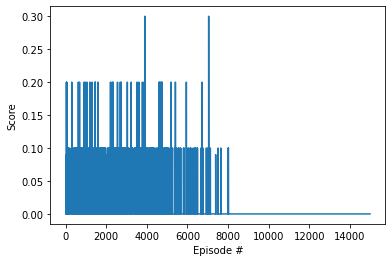


///// Beginning training set  E15.02  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  468
      Learning every      5  time steps
      Learn iterations =  2
500	Average score:   0.006,        mem:   1095/    37 ( 3.4%), avg 924.6 eps/min;  0.3 hr rem   
1000	Average score:   0.008,        mem:   1207/    72 ( 6.0%), avg 960.0 eps/min;  0.2 hr rem   
1500	Average score:   0.010,        mem:   1339/   124 ( 9.3%), avg 936.8 eps/min;  0.2 hr rem   
2000	Average score:   0.008,        mem:   1465/   158 (10.8%), avg 931.4 eps/min;  0.2 hr rem   
2500	Average score:   0.004,        mem:   1585/   195 (12.3%), avg 944.3 eps/min;  0.2 hr rem   
3000	Average score:   0.004,        mem:   1692/   233 (13.8%), avg 966.0 eps/min;  0.2 hr rem   
3500	Average score:   0.002,        mem:   1788/   258 (14.4%), avg 977.7 eps/min;  0.2 hr rem   
4000	Average score:   0.003,        mem:   1869/   267 (14.3%), avg 1001.4 eps

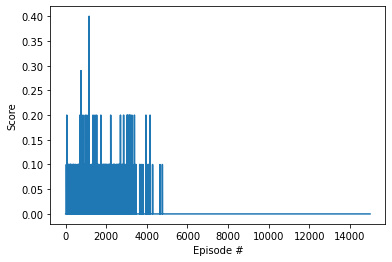


///// Beginning training set  E15.03  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  468
      Learning every      5  time steps
      Learn iterations =  4
500	Average score:   0.008,        mem:   1081/    28 ( 2.6%), avg 749.4 eps/min;  0.3 hr rem   
1000	Average score:   0.011,        mem:   1184/    71 ( 6.0%), avg 742.0 eps/min;  0.3 hr rem   
1500	Average score:   0.005,        mem:   1297/   100 ( 7.7%), avg 737.5 eps/min;  0.3 hr rem   
2000	Average score:   0.002,        mem:   1395/   114 ( 8.2%), avg 753.9 eps/min;  0.3 hr rem   
2500	Average score:   0.000,        mem:   1478/   117 ( 7.9%), avg 775.2 eps/min;  0.3 hr rem   
3000	Average score:   0.000,        mem:   1555/   117 ( 7.5%), avg 793.6 eps/min;  0.3 hr rem   
3500	Average score:   0.000,        mem:   1614/   117 ( 7.2%), avg 815.1 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:   1686/   117 ( 6.9%), avg 829.7 eps/

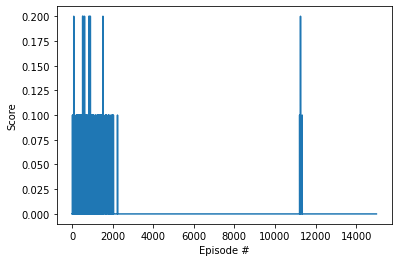


///// Beginning training set  E15.04  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  468
      Learning every      10  time steps
      Learn iterations =  1
500	Average score:   0.003,        mem:   1102/    49 ( 4.4%), avg 1132.4 eps/min;  0.2 hr rem   
1000	Average score:   0.007,        mem:   1225/    81 ( 6.6%), avg 1166.6 eps/min;  0.2 hr rem   
1500	Average score:   0.009,        mem:   1331/   119 ( 8.9%), avg 1185.9 eps/min;  0.2 hr rem   
2000	Average score:   0.009,        mem:   1463/   154 (10.5%), avg 1171.6 eps/min;  0.2 hr rem   
2500	Average score:   0.006,        mem:   1582/   206 (13.0%), avg 1168.9 eps/min;  0.2 hr rem   
3000	Average score:   0.003,        mem:   1669/   237 (14.2%), avg 1168.6 eps/min;  0.2 hr rem   
3500	Average score:   0.013,        mem:   1803/   277 (15.4%), avg 1164.2 eps/min;  0.2 hr rem   
4000	Average score:   0.008,        mem:   1905/   313 (16.4%), avg 11

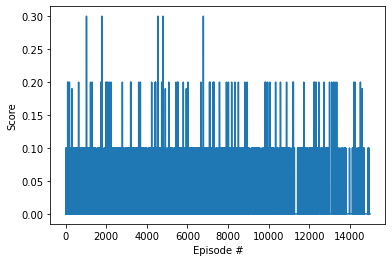


///// Beginning training set  E15.05  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  468
      Learning every      10  time steps
      Learn iterations =  2
500	Average score:   0.005,        mem:   1091/    40 ( 3.7%), avg 1057.8 eps/min;  0.2 hr rem   
1000	Average score:   0.003,        mem:   1201/    71 ( 5.9%), avg 1029.4 eps/min;  0.2 hr rem   
1500	Average score:   0.007,        mem:   1302/   103 ( 7.9%), avg 950.7 eps/min;  0.2 hr rem   
2000	Average score:   0.005,        mem:   1424/   136 ( 9.6%), avg 907.9 eps/min;  0.2 hr rem   
2500	Average score:   0.010,        mem:   1535/   174 (11.3%), avg 889.3 eps/min;  0.2 hr rem   
3000	Average score:   0.004,        mem:   1657/   206 (12.4%), avg 867.5 eps/min;  0.2 hr rem   
3500	Average score:   0.013,        mem:   1775/   241 (13.6%), avg 855.1 eps/min;  0.2 hr rem   
4000	Average score:   0.011,        mem:   1874/   268 (14.3%), avg 851.7 e

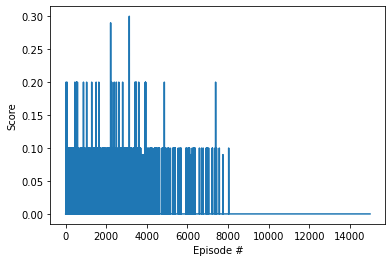


///// Beginning training set  E15.06  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  468
      Learning every      10  time steps
      Learn iterations =  4
500	Average score:   0.009,        mem:   1086/    30 ( 2.8%), avg 722.4 eps/min;  0.3 hr rem   
1000	Average score:   0.006,        mem:   1193/    58 ( 4.9%), avg 712.1 eps/min;  0.3 hr rem   
1500	Average score:   0.009,        mem:   1316/   101 ( 7.7%), avg 698.8 eps/min;  0.3 hr rem   
2000	Average score:   0.015,        mem:   1442/   143 ( 9.9%), avg 687.6 eps/min;  0.3 hr rem   
2500	Average score:   0.011,        mem:   1559/   180 (11.5%), avg 690.2 eps/min;  0.3 hr rem   
3000	Average score:   0.008,        mem:   1666/   217 (13.0%), avg 691.6 eps/min;  0.3 hr rem   
3500	Average score:   0.002,        mem:   1796/   257 (14.3%), avg 682.8 eps/min;  0.3 hr rem   
4000	Average score:   0.003,        mem:   1884/   277 (14.7%), avg 691.6 eps

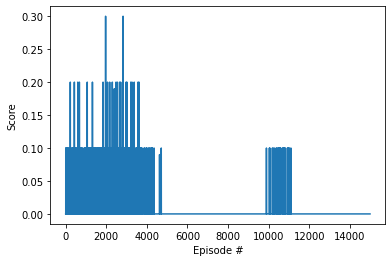


///// Beginning training set  E15.07  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  468
      Learning every      20  time steps
      Learn iterations =  1
500	Average score:   0.005,        mem:   1081/    27 ( 2.5%), avg 1250.4 eps/min;  0.2 hr rem   
1000	Average score:   0.010,        mem:   1207/    68 ( 5.6%), avg 1210.3 eps/min;  0.2 hr rem   
1500	Average score:   0.009,        mem:   1342/   109 ( 8.1%), avg 1208.3 eps/min;  0.2 hr rem   
2000	Average score:   0.012,        mem:   1465/   155 (10.6%), avg 1208.6 eps/min;  0.2 hr rem   
2500	Average score:   0.008,        mem:   1581/   189 (12.0%), avg 1212.1 eps/min;  0.2 hr rem   
3000	Average score:   0.010,        mem:   1716/   229 (13.3%), avg 1208.7 eps/min;  0.2 hr rem   
3500	Average score:   0.005,        mem:   1834/   269 (14.7%), avg 1211.0 eps/min;  0.2 hr rem   
4000	Average score:   0.007,        mem:   1973/   310 (15.7%), avg 12

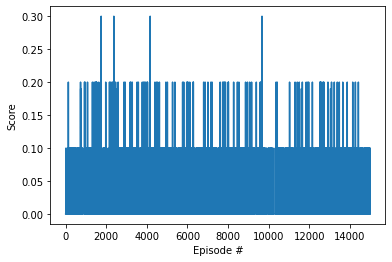


///// Beginning training set  E15.08  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  468
      Learning every      20  time steps
      Learn iterations =  2
500	Average score:   0.005,        mem:   1070/    36 ( 3.4%), avg 1188.2 eps/min;  0.2 hr rem   
1000	Average score:   0.004,        mem:   1191/    73 ( 6.1%), avg 1157.9 eps/min;  0.2 hr rem   
1500	Average score:   0.004,        mem:   1302/   110 ( 8.4%), avg 1159.2 eps/min;  0.2 hr rem   
2000	Average score:   0.002,        mem:   1423/   147 (10.3%), avg 1163.6 eps/min;  0.2 hr rem   
2500	Average score:   0.006,        mem:   1551/   187 (12.1%), avg 1147.9 eps/min;  0.2 hr rem   
3000	Average score:   0.013,        mem:   1661/   221 (13.3%), avg 1153.6 eps/min;  0.2 hr rem   
3500	Average score:   0.003,        mem:   1776/   254 (14.3%), avg 1148.7 eps/min;  0.2 hr rem   
4000	Average score:   0.007,        mem:   1875/   283 (15.1%), avg 11

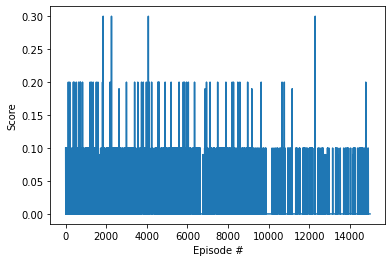


///// Beginning training set  E15.09  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  468
      Learning every      20  time steps
      Learn iterations =  4
500	Average score:   0.008,        mem:   1096/    40 ( 3.6%), avg 1048.5 eps/min;  0.2 hr rem   
1000	Average score:   0.007,        mem:   1234/    84 ( 6.8%), avg 1028.8 eps/min;  0.2 hr rem   
1500	Average score:   0.008,        mem:   1358/   116 ( 8.5%), avg 1026.2 eps/min;  0.2 hr rem   
2000	Average score:   0.004,        mem:   1472/   149 (10.1%), avg 1026.7 eps/min;  0.2 hr rem   
2500	Average score:   0.007,        mem:   1594/   195 (12.2%), avg 1024.4 eps/min;  0.2 hr rem   
3000	Average score:   0.009,        mem:   1727/   232 (13.4%), avg 1026.2 eps/min;  0.2 hr rem   
3500	Average score:   0.002,        mem:   1851/   270 (14.6%), avg 1021.1 eps/min;  0.2 hr rem   
4000	Average score:   0.004,        mem:   1943/   292 (15.0%), avg 10

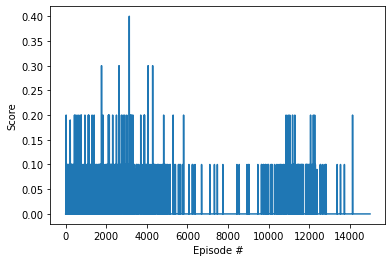


///// Beginning training set  E15.10  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  44939
      Learning every      5  time steps
      Learn iterations =  1
500	Average score:   0.006,        mem:   1086/    31 ( 2.9%), avg 1059.3 eps/min;  0.2 hr rem   
1000	Average score:   0.004,        mem:   1194/    59 ( 4.9%), avg 1084.2 eps/min;  0.2 hr rem   
1500	Average score:   0.010,        mem:   1337/    97 ( 7.3%), avg 1053.7 eps/min;  0.2 hr rem   
2000	Average score:   0.003,        mem:   1422/   119 ( 8.4%), avg 1086.6 eps/min;  0.2 hr rem   
2500	Average score:   0.013,        mem:   1565/   171 (10.9%), avg 1064.0 eps/min;  0.2 hr rem   
3000	Average score:   0.009,        mem:   1687/   214 (12.7%), avg 1056.6 eps/min;  0.2 hr rem   
3500	Average score:   0.008,        mem:   1800/   247 (13.7%), avg 1056.1 eps/min;  0.2 hr rem   
4000	Average score:   0.010,        mem:   1909/   278 (14.6%), avg 1

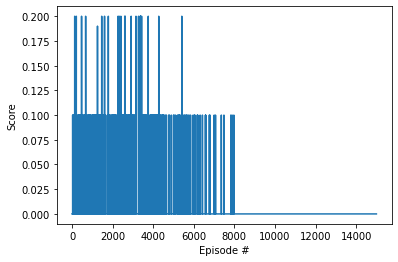


///// Beginning training set  E15.11  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  44939
      Learning every      5  time steps
      Learn iterations =  2
500	Average score:   0.013,        mem:   1104/    51 ( 4.6%), avg 857.1 eps/min;  0.3 hr rem   
1000	Average score:   0.006,        mem:   1235/    92 ( 7.4%), avg 858.4 eps/min;  0.3 hr rem   
1500	Average score:   0.003,        mem:   1348/   127 ( 9.4%), avg 886.3 eps/min;  0.3 hr rem   
2000	Average score:   0.007,        mem:   1457/   163 (11.2%), avg 893.4 eps/min;  0.2 hr rem   
2500	Average score:   0.006,        mem:   1557/   182 (11.7%), avg 916.0 eps/min;  0.2 hr rem   
3000	Average score:   0.004,        mem:   1677/   210 (12.5%), avg 912.1 eps/min;  0.2 hr rem   
3500	Average score:   0.004,        mem:   1743/   219 (12.6%), avg 939.7 eps/min;  0.2 hr rem   
4000	Average score:   0.002,        mem:   1810/   224 (12.4%), avg 961.8 ep

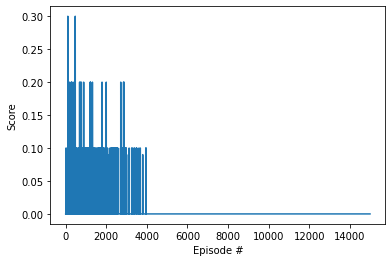


///// Beginning training set  E15.12  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  44939
      Learning every      5  time steps
      Learn iterations =  4
500	Average score:   0.007,        mem:   1076/    36 ( 3.3%), avg 773.6 eps/min;  0.3 hr rem   
1000	Average score:   0.008,        mem:   1182/    81 ( 6.9%), avg 746.4 eps/min;  0.3 hr rem   
1500	Average score:   0.002,        mem:   1295/   103 ( 8.0%), avg 729.8 eps/min;  0.3 hr rem   
2000	Average score:   0.006,        mem:   1393/   122 ( 8.8%), avg 741.3 eps/min;  0.3 hr rem   
2500	Average score:   0.001,        mem:   1487/   136 ( 9.1%), avg 753.1 eps/min;  0.3 hr rem   
3000	Average score:   0.004,        mem:   1583/   148 ( 9.3%), avg 763.5 eps/min;  0.3 hr rem   
3500	Average score:   0.000,        mem:   1656/   150 ( 9.1%), avg 783.7 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:   1729/   151 ( 8.7%), avg 801.5 ep

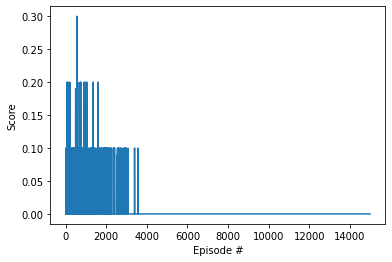


///// Beginning training set  E15.13  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  44939
      Learning every      10  time steps
      Learn iterations =  1
500	Average score:   0.008,        mem:   1093/    39 ( 3.6%), avg 1167.7 eps/min;  0.2 hr rem   
1000	Average score:   0.007,        mem:   1217/    82 ( 6.7%), avg 1154.7 eps/min;  0.2 hr rem   
1500	Average score:   0.005,        mem:   1335/   121 ( 9.1%), avg 1157.7 eps/min;  0.2 hr rem   
2000	Average score:   0.004,        mem:   1441/   152 (10.5%), avg 1163.4 eps/min;  0.2 hr rem   
2500	Average score:   0.004,        mem:   1566/   183 (11.7%), avg 1167.1 eps/min;  0.2 hr rem   
3000	Average score:   0.005,        mem:   1672/   212 (12.7%), avg 1173.8 eps/min;  0.2 hr rem   
3500	Average score:   0.012,        mem:   1785/   258 (14.5%), avg 1171.8 eps/min;  0.2 hr rem   
4000	Average score:   0.004,        mem:   1905/   298 (15.6%), avg 

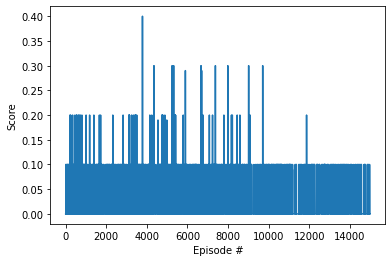


///// Beginning training set  E15.14  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  44939
      Learning every      10  time steps
      Learn iterations =  2
500	Average score:   0.009,        mem:   1092/    45 ( 4.1%), avg 1048.3 eps/min;  0.2 hr rem   
1000	Average score:   0.007,        mem:   1200/    80 ( 6.7%), avg 1068.7 eps/min;  0.2 hr rem   
1500	Average score:   0.008,        mem:   1319/   123 ( 9.3%), avg 1055.7 eps/min;  0.2 hr rem   
2000	Average score:   0.008,        mem:   1439/   156 (10.8%), avg 1060.0 eps/min;  0.2 hr rem   
2500	Average score:   0.007,        mem:   1539/   189 (12.3%), avg 1066.1 eps/min;  0.2 hr rem   
3000	Average score:   0.003,        mem:   1661/   225 (13.5%), avg 1053.2 eps/min;  0.2 hr rem   
3500	Average score:   0.004,        mem:   1796/   265 (14.8%), avg 1041.7 eps/min;  0.2 hr rem   
4000	Average score:   0.012,        mem:   1915/   307 (16.0%), avg 

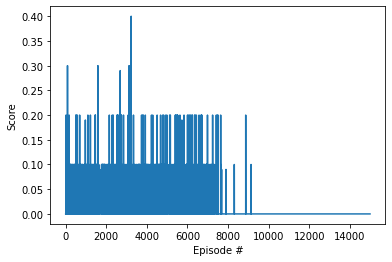


///// Beginning training set  E15.15  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  44939
      Learning every      10  time steps
      Learn iterations =  4
500	Average score:   0.015,        mem:   1094/    43 ( 3.9%), avg 857.9 eps/min;  0.3 hr rem   
1000	Average score:   0.001,        mem:   1203/    75 ( 6.2%), avg 905.6 eps/min;  0.3 hr rem   
1500	Average score:   0.005,        mem:   1311/   101 ( 7.7%), avg 912.5 eps/min;  0.2 hr rem   
2000	Average score:   0.005,        mem:   1447/   137 ( 9.5%), avg 899.1 eps/min;  0.2 hr rem   
2500	Average score:   0.002,        mem:   1547/   158 (10.2%), avg 913.6 eps/min;  0.2 hr rem   
3000	Average score:   0.002,        mem:   1643/   167 (10.2%), avg 930.6 eps/min;  0.2 hr rem   
3500	Average score:   0.000,        mem:   1708/   170 (10.0%), avg 958.6 eps/min;  0.2 hr rem   
4000	Average score:   0.000,        mem:   1776/   173 ( 9.7%), avg 981.6 e

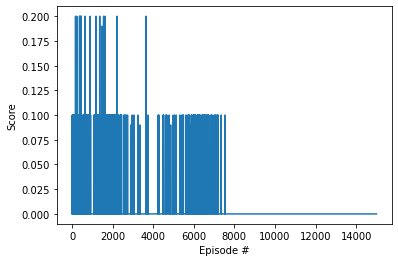


///// Beginning training set  E15.16  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  44939
      Learning every      20  time steps
      Learn iterations =  1
500	Average score:   0.005,        mem:   1081/    28 ( 2.6%), avg 1287.8 eps/min;  0.2 hr rem   
1000	Average score:   0.003,        mem:   1189/    63 ( 5.3%), avg 1265.8 eps/min;  0.2 hr rem   
1500	Average score:   0.011,        mem:   1299/   102 ( 7.9%), avg 1223.5 eps/min;  0.2 hr rem   
2000	Average score:   0.014,        mem:   1428/   144 (10.1%), avg 1212.8 eps/min;  0.2 hr rem   
2500	Average score:   0.004,        mem:   1548/   182 (11.8%), avg 1219.0 eps/min;  0.2 hr rem   
3000	Average score:   0.004,        mem:   1641/   206 (12.6%), avg 1226.1 eps/min;  0.2 hr rem   
3500	Average score:   0.005,        mem:   1745/   229 (13.1%), avg 1237.4 eps/min;  0.2 hr rem   
4000	Average score:   0.005,        mem:   1833/   253 (13.8%), avg 

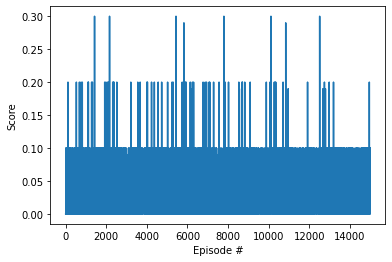


///// Beginning training set  E15.17  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  44939
      Learning every      20  time steps
      Learn iterations =  2
500	Average score:   0.003,        mem:   1095/    37 ( 3.4%), avg 1154.4 eps/min;  0.2 hr rem   
1000	Average score:   0.012,        mem:   1231/    80 ( 6.5%), avg 1131.1 eps/min;  0.2 hr rem   
1500	Average score:   0.010,        mem:   1355/   125 ( 9.2%), avg 1128.1 eps/min;  0.2 hr rem   
2000	Average score:   0.006,        mem:   1476/   164 (11.1%), avg 1141.8 eps/min;  0.2 hr rem   
2500	Average score:   0.007,        mem:   1587/   198 (12.5%), avg 1143.6 eps/min;  0.2 hr rem   
3000	Average score:   0.004,        mem:   1681/   226 (13.4%), avg 1155.6 eps/min;  0.2 hr rem   
3500	Average score:   0.008,        mem:   1794/   262 (14.6%), avg 1156.1 eps/min;  0.2 hr rem   
4000	Average score:   0.006,        mem:   1897/   295 (15.6%), avg 

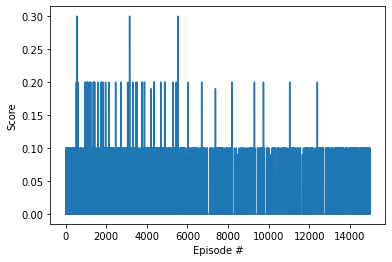


///// Beginning training set  E15.18  with:
      Bad step prob    =  0.01
      Buffer size      =  20500
      Batch size       =  1000
      Seed             =  44939
      Learning every      20  time steps
      Learn iterations =  4
500	Average score:   0.006,        mem:   1072/    30 ( 2.8%), avg 1111.0 eps/min;  0.2 hr rem   
1000	Average score:   0.008,        mem:   1200/    65 ( 5.4%), avg 1055.8 eps/min;  0.2 hr rem   
1500	Average score:   0.005,        mem:   1315/    91 ( 6.9%), avg 1065.4 eps/min;  0.2 hr rem   
2000	Average score:   0.006,        mem:   1440/   120 ( 8.3%), avg 1063.2 eps/min;  0.2 hr rem   
2500	Average score:   0.007,        mem:   1526/   146 ( 9.6%), avg 1068.8 eps/min;  0.2 hr rem   
3000	Average score:   0.000,        mem:   1617/   165 (10.2%), avg 1084.0 eps/min;  0.2 hr rem   
3500	Average score:   0.005,        mem:   1724/   189 (11.0%), avg 1088.1 eps/min;  0.2 hr rem   
4000	Average score:   0.003,        mem:   1812/   204 (11.3%), avg 

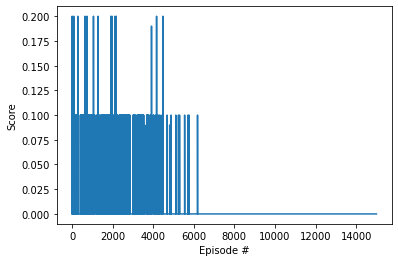



DONE!


In [3]:
# This cell will explore several combinations of hyperparams by training all of them

TIME_STEPS = 200
SAVE_ANALYSIS = False

if EXPLORE:
    
    EPISODES       = 15001
    RUN_PREFIX     = "E15"
    DECAY          = 1.0 #was 0.9999
    SEEDS          = (468, 44939) #(0, 111, 468, 5555, 23100, 44939)
    BAD_STEP_PROBS = (0.01,)
    BATCHES        = (1000,)
    LEARN_EVERYS   = (5, 10, 20)
    LEARN_ITERS    = (1, 2, 4)
    
    num_sets = len(BAD_STEP_PROBS) * len(BATCHES ) * len(SEEDS) * len(LEARN_EVERYS) * len(LEARN_ITERS)
    print("Ready to train over {} training sets for {} episodes each".format(num_sets, EPISODES))
    set_id = 0
    for BAD_STEP_PROB in BAD_STEP_PROBS:
        for BATCH in BATCHES:
            for SEED in SEEDS:
                for LEARN_EVERY in LEARN_EVERYS:
                    for LEARN_ITER in LEARN_ITERS:
                        
                        # set the replay buffer size to that it fills after ~5000 bad episodes
                        # (at ~14 experiences/episode), based on the bad step retention rate
                        buffer_size = int(70000 - 50000*(1.0 - BAD_STEP_PROB))
                        
                        set_id += 1
                        RUN_NAME = "{}.{:02d}".format(RUN_PREFIX, set_id)
                        print("\n///// Beginning training set ", RUN_NAME, " with:")
                        print("      Bad step prob    = ", BAD_STEP_PROB)
                        print("      Buffer size      = ", buffer_size)
                        print("      Batch size       = ", BATCH)
                        print("      Seed             = ", SEED)
                        print("      Learning every     ", LEARN_EVERY, " time steps")
                        print("      Learn iterations = ", LEARN_ITER)
    
                        ##### instantiate the agents and perform the training

                        maddpg = Maddpg(state_size, action_size, 2, bad_step_prob=BAD_STEP_PROB,
                                        random_seed=SEED, batch_size=BATCH, buffer_size=buffer_size,
                                        noise_decay=DECAY, learn_every=LEARN_EVERY, learn_iter=LEARN_ITER)

                        scores = train(maddpg, env, run_name=RUN_NAME, max_episodes=EPISODES, 
                                       winning_score=0.5, max_time_steps=TIME_STEPS,
                                       checkpoint_interval=500)

                        ##### plot the training reward history

                        fig = plt.figure()
                        ax = fig.add_subplot(111)
                        plt.plot(np.arange(len(scores)), scores)
                        plt.ylabel('Score')
                        plt.xlabel('Episode #')
                        plt.show()
                        
                        ##### store the action/noise data, if being used
                        
                        if SAVE_ANALYSIS:
                            maddpg.save_anal_data()
                        
    print("\n\nDONE!")

# HEY JOHN - TODO!

- update main.py to match the above code {ALL CELLS}
- Test running from cmd line (may need a script?)
- Clean up the bottom part of this notebook

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [4]:
"""
for i in range(10):                                        # play game for several episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations             3     # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    num_steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        num_steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Episode {}: {:5.3f}, took {} steps'.format(i, np.max(scores), num_steps))
"""

"\nfor i in range(10):                                        # play game for several episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations             3     # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    num_steps = 0\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_i

When finished, you can close the environment.

In [5]:
env.close()